<a href="https://colab.research.google.com/github/miteshtiwary123/bookstore-webscrapping/blob/main/online_bookstore_webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##creating empty list

In [59]:
import requests
import bs4
import pandas as pd

In [60]:
pages=[]
prices=[]
ratings=[]
title=[]
urls=[]

In [61]:
no_of_pages = 50 # number of pages to be selected

In [62]:
for i in range(1,no_of_pages+1):
  url=('http://books.toscrape.com/catalogue/page-{}.html'.format(i))

  pages.append(url)

In [63]:
print('Number of pages: ', len(pages))
print(pages)

Number of pages:  50
['http://books.toscrape.com/catalogue/page-1.html', 'http://books.toscrape.com/catalogue/page-2.html', 'http://books.toscrape.com/catalogue/page-3.html', 'http://books.toscrape.com/catalogue/page-4.html', 'http://books.toscrape.com/catalogue/page-5.html', 'http://books.toscrape.com/catalogue/page-6.html', 'http://books.toscrape.com/catalogue/page-7.html', 'http://books.toscrape.com/catalogue/page-8.html', 'http://books.toscrape.com/catalogue/page-9.html', 'http://books.toscrape.com/catalogue/page-10.html', 'http://books.toscrape.com/catalogue/page-11.html', 'http://books.toscrape.com/catalogue/page-12.html', 'http://books.toscrape.com/catalogue/page-13.html', 'http://books.toscrape.com/catalogue/page-14.html', 'http://books.toscrape.com/catalogue/page-15.html', 'http://books.toscrape.com/catalogue/page-16.html', 'http://books.toscrape.com/catalogue/page-17.html', 'http://books.toscrape.com/catalogue/page-18.html', 'http://books.toscrape.com/catalogue/page-19.html',

In [64]:
for item in pages:
  page=requests.get(item)
  soup=bs4.BeautifulSoup(page.text,'html.parser')

In [ ]:
print(soup.prettify())

#Finding all the titles

In [ ]:
for t in soup.findAll('h3'):
  print(t)

In [67]:
for t in soup.findAll('h3'):
  titless = t.getText()
  title.append(titless)

In [68]:
titless

'1,000 Places to See ...'

In [ ]:
title

#**Finding all the Prices**

In [70]:
for p in soup.find_all('p', class_='price_color'):
  price=p.getText()
  prices.append(price)

In [71]:
print(prices)

['Â£38.00', 'Â£28.80', 'Â£39.24', 'Â£32.93', 'Â£51.32', 'Â£47.09', 'Â£28.42', 'Â£22.85', 'Â£41.24', 'Â£39.07', 'Â£29.82', 'Â£37.26', 'Â£20.30', 'Â£34.65', 'Â£43.38', 'Â£55.53', 'Â£57.06', 'Â£16.97', 'Â£53.98', 'Â£26.08']


In [ ]:
for s in soup.find_all('p', class_='star-rating'):
  for k,v in s.attrs.items():
    star = v[1]
    ratings.append(star)
    print(star)

#**Finding all the URL's of the images**

In [73]:
divs = soup.find_all('div', class_='image_container')
for thumbs in divs:
  tagss = thumbs.find('img', class_='thumbnail')
  links='http://books.toscrape.com/' + str(tagss['src'])
  newlinks = links.replace('..','')
  urls.append(newlinks)

In [ ]:
divs

In [ ]:
links

In [ ]:
newlinks

In [ ]:
urls

#**Data Processing on Scraped Data**

In [78]:
web_data = {'Title' :title, 'Price' :prices, 'Ratings' :ratings, 'URL' :urls}

In [79]:
print(len(title))
print(len(prices))
print(len(ratings))
print(len(urls))

20
20
20
20


#Convert dictionary to Dataframe

In [80]:
df = pd.DataFrame(web_data)

In [ ]:
df

In [ ]:
df.index+=1
df

In [ ]:
df['Price'] = df['Price'].str.replace('Â£','')
df

In [84]:
df.sort_values(by='Price', ascending=False, inplace=True)

In [85]:
df['Ratings'] = df['Ratings'].replace({'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5})

In [86]:
df.dtypes

Title      object
Price      object
Ratings     int64
URL        object
dtype: object

In [87]:
df['Price'] = df['Price'].astype(float)

In [ ]:
df.dtypes

In [ ]:
df.corr()

#We can visualise it

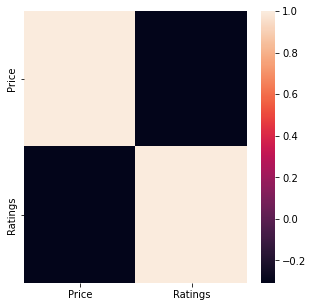

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(df.corr())